# Student Perfomance Dataset

merged two dataset

In [31]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing two Student Perfomance Dataset Dataset
d1=pd.read_csv("C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Student Performance/data/student-mat.csv",sep=";")
d2=pd.read_csv("C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Student Performance/data/student-por.csv",sep=";")
# merging two dataset
dataset=pd.concat([d1, d2],ignore_index=True)
datatype = np.array(['1','1','0','1','1','1','0','0','1','1','1','1','0','0','0','1','1','1','1','1','1','1','1','0','0','0','0','0','0','0','0','0'])
data = pd.DataFrame(dataset[1:])
X = data.iloc[:, :32].values
Y = data.iloc[:, 32].values
print(X)
print(Y)

[['GP' 'F' 17 ... 4 5 5]
 ['GP' 'F' 15 ... 10 7 8]
 ['GP' 'F' 15 ... 2 15 14]
 ...
 ['MS' 'F' 18 ... 6 11 12]
 ['MS' 'M' 17 ... 6 10 10]
 ['MS' 'M' 18 ... 4 10 11]]
[ 6 10 15 ...  9 10 11]


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-nul

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in range(0,31):
    if datatype[i]=='1':
        X[:,i]  = labelencoder.fit_transform(X[:,i])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [35]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(random_state=0),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression()]

accuracy= np.zeros(6)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 71.59037315978671
Accuracy for DecisionTreeRegressor: 68.38194721920962
Accuracy for RandomForestRegressor: 79.09220713677492
Accuracy for AdaBoostRegressor: 80.79974197860125
Accuracy for GaussianProcessRegressor: 81.95505909408053
Accuracy for LinearRegression: 81.96781331312852


Text(0.5, 1.0, 'Wine Quality Dataset model accuracy')

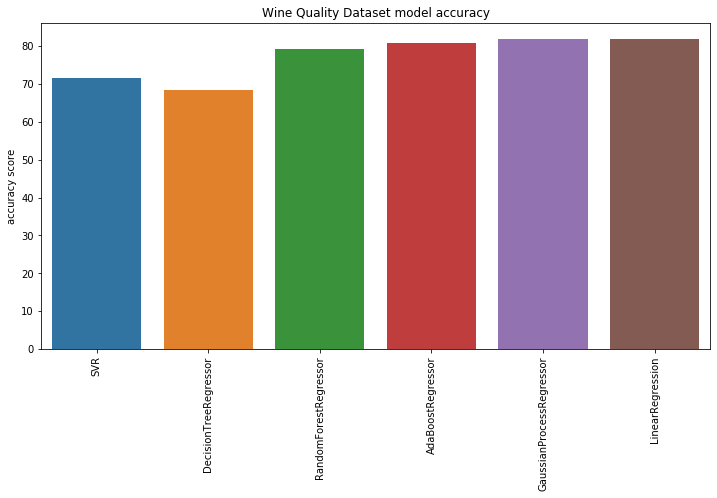

In [37]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Wine Quality Dataset model accuracy')